# E-tivity 1 - EDA
* Student Name: Dylan Butler
* Student Number: 21218684

### Part (A): 
> Formulate a particular question that might be interesting to answer by exploring this dataset (approx. 50 words in a markdown cell).

### Overview:
The dataset that we will be working with in this e-tivity is called the "Bank Marketing Dataset" which has been provided by a Portuguese banking institution. The target variable "subscribed" is related to whether or not a client subscribed a term deposit to the bank or not. I think an interesting route to follow would be to focus on measuring the uptake in subscriptions by observing the "Jobs":
* Question to focus on:
    * What professions tend to subsribe more to the term-deposit scheme?

## Import required libs + dataset
more info on the dataset: http://archive.ics.uci.edu/ml/datasets/Bank+Marketing#

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#read in ds
df = pd.read_csv('./bank.csv')

In [4]:
df.head()

age          job   marital  education default  balance housing loan  \
0  32.0   technician    single   tertiary      no      392     yes   no   
1  39.0   technician  divorced  secondary      no      688     yes  yes   
2  59.0      retired   married  secondary      no     1035     yes  yes   
3  47.0  blue-collar   married  secondary      no      398     yes  yes   
4  54.0      retired   married  secondary      no     1004     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome  \
0  cellular    1   apr       957         2    131         2  failure   
1  cellular    1   apr       233         2    133         1  failure   
2  cellular    1   apr       126         2    239         1  failure   
3  cellular    1   apr       274         1    238         2  failure   
4  cellular    1   apr       479         1    307         1  failure   

  subscribed  
0         no  
1         no  
2         no  
3         no  
4         no

### Part (B) - Describe Categorical/Numerical Stats

#### Numerical

In [5]:
df.describe()

age       balance          day     duration     campaign  \
count  1988.000000   2000.000000  2000.000000  2000.000000  2000.000000   
mean     41.753018   1413.663500    13.851500   292.020500     1.909500   
std      12.724358   3131.224213     9.712189   221.557295     1.378862   
min      18.000000   -980.000000     1.000000     7.000000     1.000000   
25%      32.000000    201.500000     5.000000   146.000000     1.000000   
50%      38.000000    551.000000    12.000000   236.000000     1.000000   
75%      50.000000   1644.500000    23.000000   379.000000     2.000000   
max      93.000000  81204.000000    31.000000  1823.000000    11.000000   

             pdays     previous  
count  2000.000000  2000.000000  
mean    167.896000     2.561500  
std     131.754126     3.400735  
min      -1.000000     0.000000  
25%      75.750000     1.000000  
50%     182.000000     2.000000  
75%     251.000000     3.000000  
max     854.000000    55.000000

#### Numerical Observations:
* `age` - notice that the minimum age in the dataset is 18 while the maximum is 93 years old. We can also see that the average age of the customers is 41 years old.
* `balance` - the minimum balance is recorded @ -980.00 while the max stands at 81,204.00, average is ~1413.66
    * we can also see that there is a high standard deviation associated with the balance indicating the the values have a high variability. i.e. not clustered around the mean
* In general, the data is well populated other than `age`, which is missing *12* values.
* `pdays` seems to have a minumum value of *-1*. When looking at the dataset information - it states: *__"number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)"__* this will need to be further investigated
* `duration` has a note attached in the information:
    * *important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.*  

#### Categorical

In [6]:
df.describe(include = 'object')

job  marital  education default housing  loan   contact month  \
count         1990     2000       1896    2000    2000  2000      1809  2000   
unique          11        3          3       2       2     2         2    12   
top     management  married  secondary      no      no    no  cellular   feb   
freq           461     1111        995    1985    1037  1750      1663   404   

       poutcome subscribed  
count      1546       2000  
unique        3          2  
top     failure         no  
freq        955       1000

#### Categorical Observations:
* Missing Values: Compared to the numerical features there seems to be a lot more missing values.
    * Number of values missing:
        * `job` - is missing 10
        * `education` - missing 104
        * `contact` - missing 191
        * `poutcome` - missing 454
    * `poutcome`'s missing values shoul cause some sort of concern as it is a large amount of the dataset (roughly 22%) - advanced techniques for dealing with missing values would be required here such as imputation.
* `loan` - shows us that 87.5% have not had a personal loan before. It will be interesting to see how important this stat is to the output variable. The same goes for `contact`. 
* `subscribed` - our target variable is showing us that the dataset is balanced and would not require any balancing techniques such as over/under sampling

### Correlations in the data

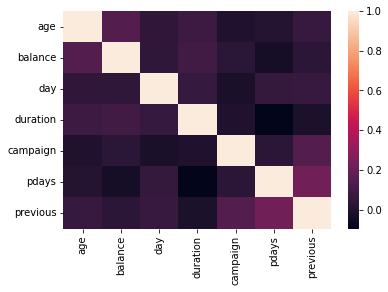

In [7]:
#correlation matrix
sns.heatmap(df.corr());

Our correlation matrix looks good and there doesn't seem to be anything sticking out as most of them are showing weak correlations. This is good as it means all features are used are not redundant. 

### Part (C)
### Plotting Distributions for Numerical Features
For this analysis I will look at the following:
* look at the general distribution
* boxplots for subscribed classes
* median using a point plot

In [8]:
num_feats=list(df.describe().columns)

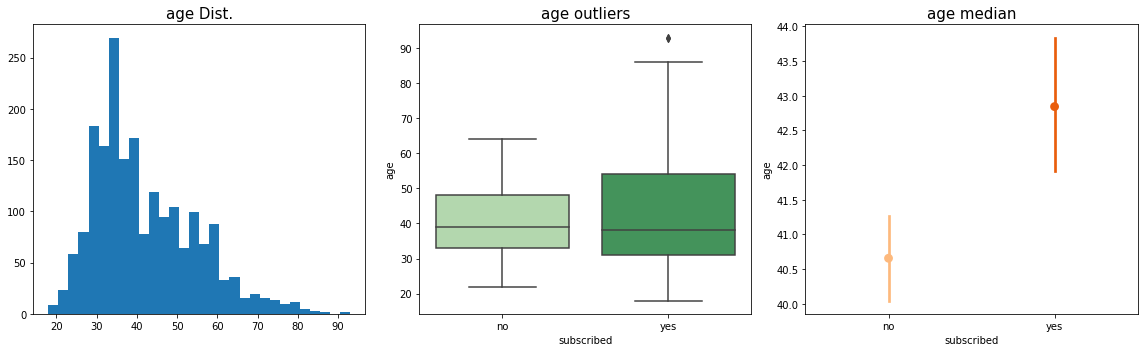

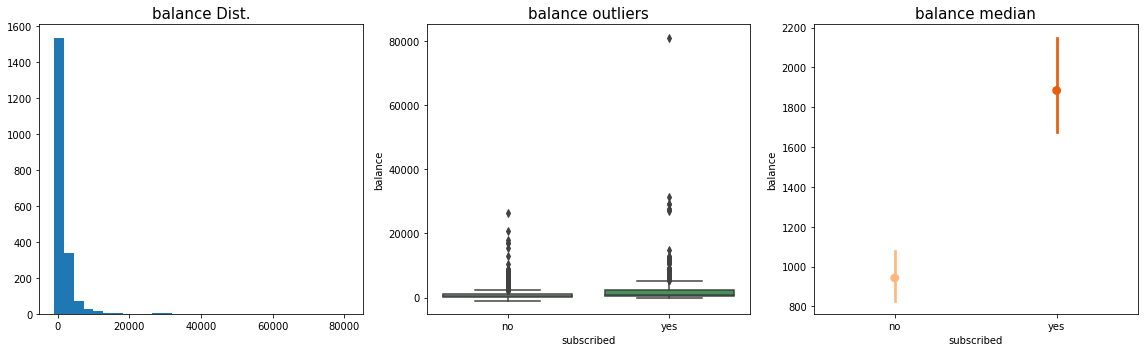

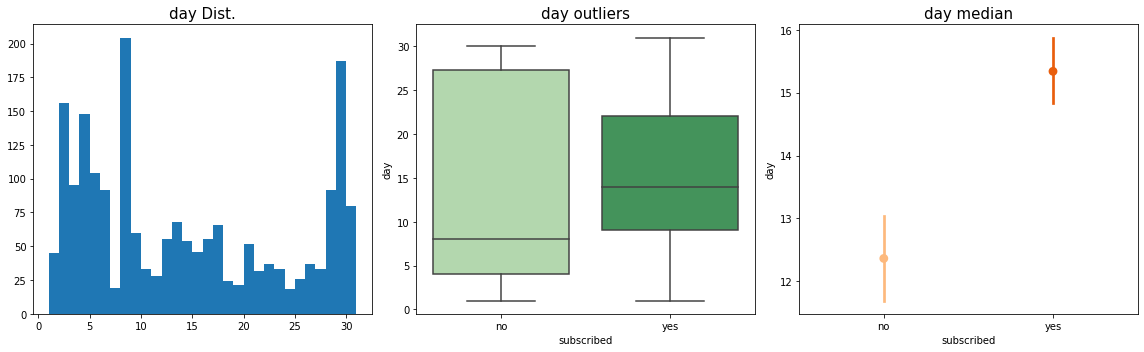

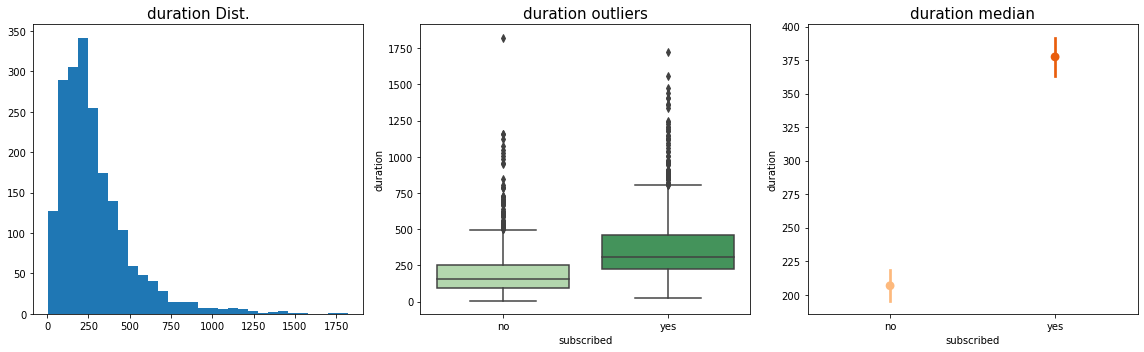

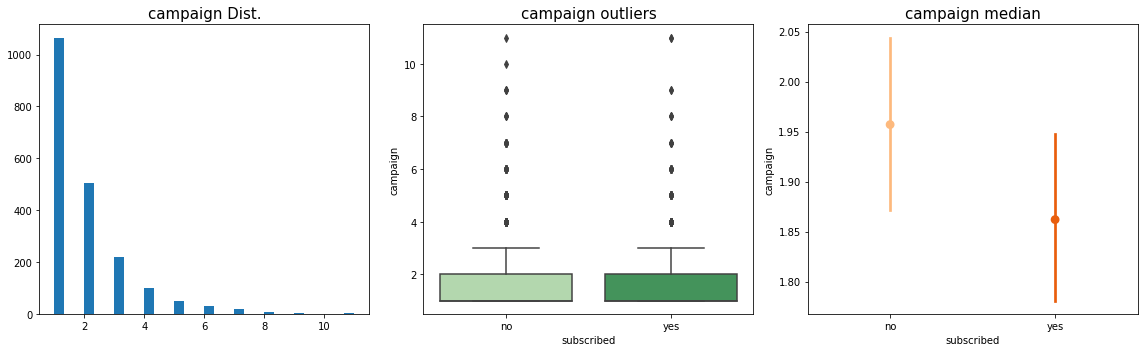

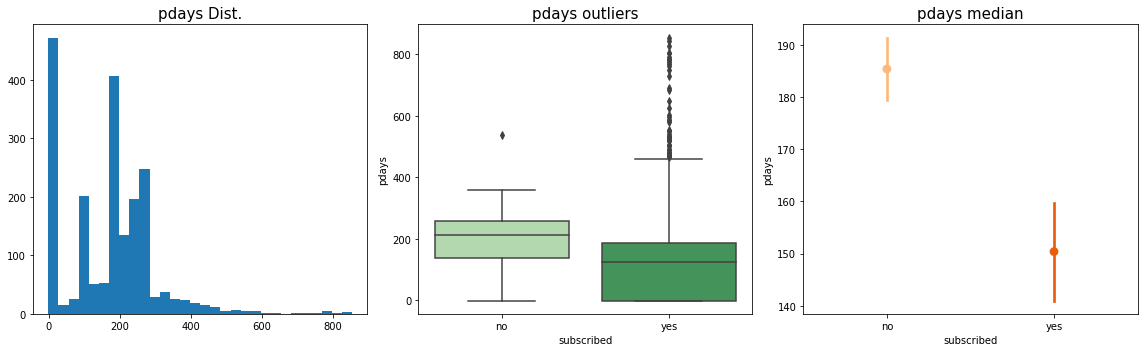

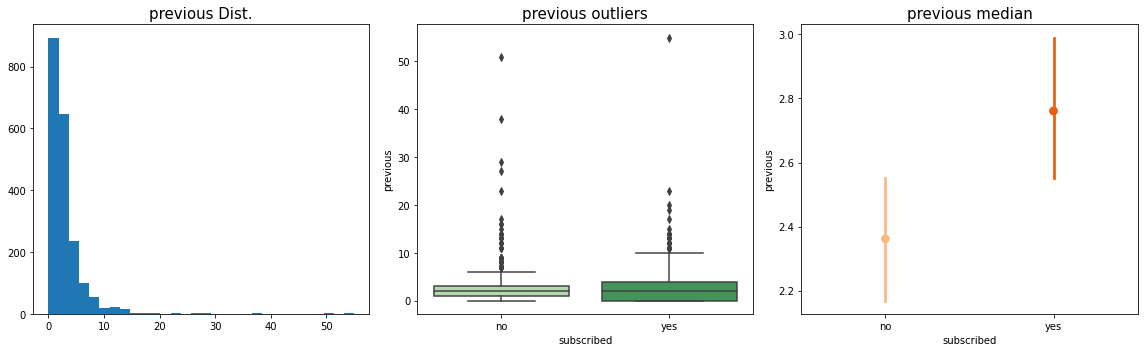

In [9]:
fs=15
for col in num_feats:
    #settings
    fig, ax =  plt.subplots(nrows=1, ncols=3, figsize = (16,5))
    ax = ax.reshape(-1)
    
    # histogram
    ax[0].hist(df[col], bins=30)
    ax[0].set_title(col + ' Dist.', fontsize=fs)
    
    # boxplot
    sns.boxplot(data=df, y=col, x='subscribed', ax=ax[1], palette = 'Greens')
    ax[1].set_title(col + ' outliers', fontsize=fs)
    
    # plotting median
    sns.pointplot(data=df, y= col, x='subscribed', ax=ax[2], palette = 'Oranges')
    ax[2].set_title(col + ' median', fontsize=fs)
    
    plt.tight_layout()

### Conclusion for Numerical Attributes

Some observations from the above graphs
* The management job title generated the highest number of subscriptions.
* 90.63% of students subscribed to the service - highest uptake in a given category
* Bank Balance Median is much higher for those that subscribed compared to those that did not.
* Outliers seems to have crept into a number of the features - this would need to be handled using some data preparation techniques such as normalization.
* `Day` and `Duration` show interesting results when looking at the mean of those that subscribed vs. those that didn't - 'yes' is towards the shifting towards the end of the month where 'no' seems to be gathering around the start of the month. `Duration` - makes sense as those interested will be curious and tend to ask more questions vs. those that have no interest more than likely will generate a shorter conversation.  

### Part C
> Generate two plots with the combined distribution of attributes and draw conclusions from them

##### Lets focus on the Job Feature

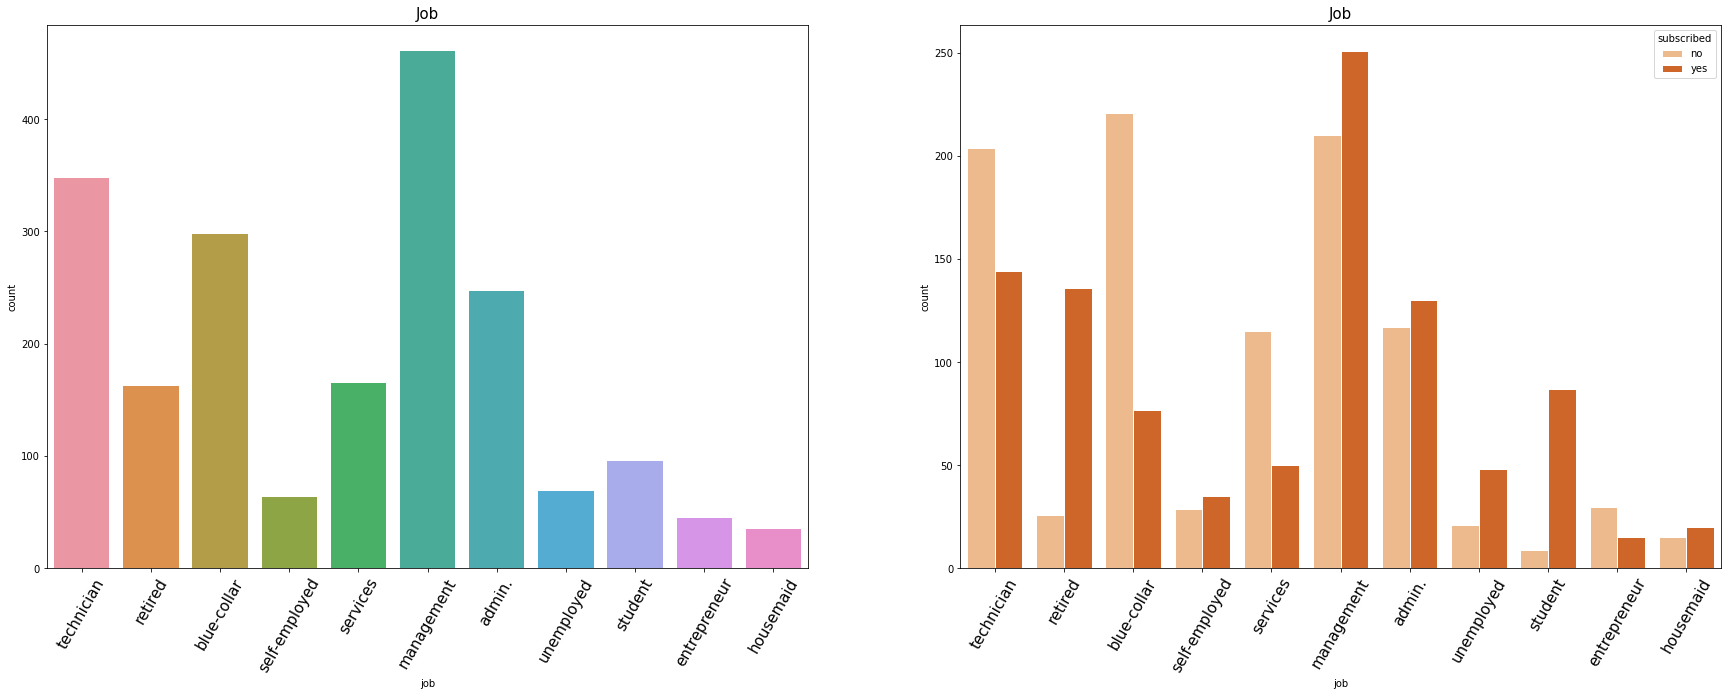

In [48]:
fig, axs =  plt.subplots(nrows=1, ncols=2, figsize = (30,10))
axs = axs.reshape(-1)
    
sns.countplot(data=df, x='job', ax=axs[0])
axs[0].set_title('Job', fontsize=fs)
axs[0].set_xticklabels(labels = df['job'].dropna().unique(), rotation=60, fontsize=fs)


sns.countplot(data=df, x= 'job', hue='subscribed', ax=axs[1], palette = 'Oranges', edgecolor = 'w')
axs[1].set_title('Job', fontsize=fs)
axs[1].set_xticklabels(labels = df['job'].dropna().unique(), rotation=60, fontsize=fs)
plt.show()

In [11]:
df[df.job=='student'].subscribed.value_counts()

yes    87
no      9
Name: subscribed, dtype: int64

## Job Percentages:
> here we focus on looking at % of successful contacts within a sub category and then vs total contacts.

In [19]:
#lets define a function to generate the subscription rate
def subs_rate(df, feat):
    tmp=df[feat].value_counts()\
            .rename('total_contacts')\
            .reset_index()
    tmp.set_index('index', inplace=True)
    #get the value of total subscriptions for given feature
    tmp['total_subs']=df[df.subscribed=='yes'][feat].value_counts().loc[tmp.index]
    #gen % of those contacted
    tmp['perc_contact']=tmp.total_contacts / tmp.total_contacts.sum() * 100
    #gen % of global subs
    tmp['perc_subs_global']=tmp.total_subs / tmp.total_contacts.sum() * 100
    # gen % of category subs
    tmp['perc_subs_cat']=tmp.total_subs / tmp.total_contacts * 100
    #return sorted from largest to smallest
    return tmp.sort_values(by='perc_subs_cat', ascending=False)

In [20]:
res=subs_rate(df, 'job')

In [23]:
res

total_contacts  total_subs  perc_contact  perc_subs_global  \
index                                                                       
student                    96          87      4.824121          4.371859   
retired                   162         136      8.140704          6.834171   
unemployed                 69          48      3.467337          2.412060   
housemaid                  35          20      1.758794          1.005025   
self-employed              64          35      3.216080          1.758794   
management                461         251     23.165829         12.613065   
admin.                    247         130     12.412060          6.532663   
technician                348         144     17.487437          7.236181   
entrepreneur               45          15      2.261307          0.753769   
services                  165          50      8.291457          2.512563   
blue-collar               298          77     14.974874          3.869347   

               perc_subs_cat  
index                         
student            90.625000  
retired            83.950617  
unemployed         69.565217  
housemaid          57.142857  
self-employed      54.687500  
management         54.446855  
admin.             52.631579  
technician         41.379310  
entrepreneur       33.333333  
services           30.303030  
blue-collar        25.838926

### lets plot the results

#### (1) Subscription Rates within Job Categories

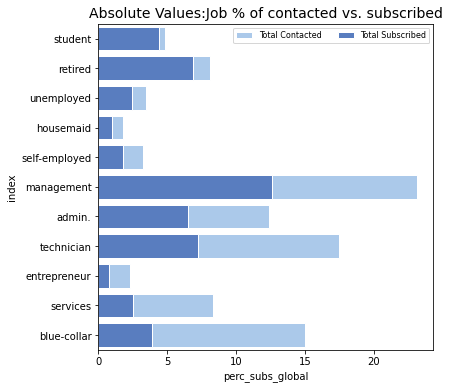

In [39]:
f, ax = plt.subplots(figsize = (6, 6))

contacted, subscribed = res['perc_contact'], res['perc_subs_global']

sns.set_color_codes('pastel')
sns.barplot(x = contacted, y = contacted.index,
            label = 'Total Contacted', color = 'b', edgecolor = 'w')

sns.set_color_codes('muted')
sns.barplot(x = subscribed, y = subscribed.index,
            label = 'Total Subscribed', color = 'b', edgecolor = 'w')

ax.legend(ncol = 2, loc = 'upper right', fontsize = 8)
plt.title('Absolute Values: Job % of contacted vs. subscribed', fontsize = 14)
plt.show()

#### (2) Subscription Rates for Job Categories vs absolute contacts made 

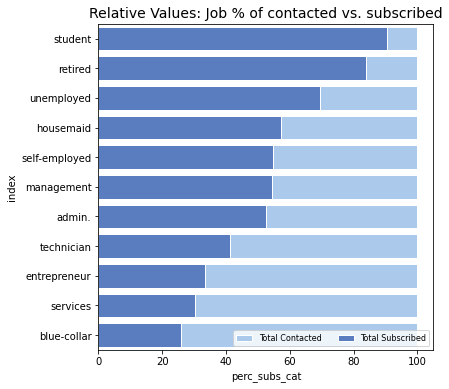

In [40]:
f, ax = plt.subplots(figsize = (6, 6))

contacted= pd.Series(
    np.ones(len(res))*100,
    index=res.index
)
subscribed = res['perc_subs_cat']

sns.set_color_codes('pastel')
sns.barplot(x = contacted, y = contacted.index,
            label = 'Total Contacted', color = 'b', edgecolor = 'w')

sns.set_color_codes('muted')
sns.barplot(x = subscribed, y = subscribed.index,
            label = 'Total Subscribed', color = 'b', edgecolor = 'w')

ax.legend(ncol = 2, loc = 'lower right', fontsize = 8)
plt.title('Relative Values: Job % of contacted vs. subscribed', fontsize = 14)
plt.show()

### Analysis

#### Global View
The graphs presented generate very interesting results when we pick apart the job data. When we look at the % success metric for subscriptions we can see that `management` is a clear winner in terms of total successful subscriptions. However, notice that there are also a large number of unsuccessful attempts. `technicians` have the second highest number of subscriptions, but the number of unsuccessful hits outweights it. 

#### Relative View:
When we focus on segregating the various professions and looking at their success rates we can see that `students` have the best success rate (90.6%) next sits `retired` @ 83.95% and interestingly enough `unemployed` has a large uptake in subscriptions - further look at the mean bank balance for unemployed could help clear up some questions around this. Also, another way to look at it would be that they could be stay at home parents receiving benefits etc. 
`Management` had the most subscriptions overall but when we look at a segregated view we can see it falls in ranking as mentioned previously

##### Quick balance analysis

In [62]:
df[(df.job=='unemployed') & (df.subscribed=='yes')].balance.mean()

1250.8958333333333

In [63]:
df[(df.job=='unemployed') & (df.subscribed=='no')].balance.mean()

945.7619047619048

The above is a quick calc to see the mean bank balance for the unemployed that subscribed is a couple of hundred higher vs. those that did not

Students have a very interesting trend ...

In [64]:
# student - subsc'd
df[(df.job=='student') & (df.subscribed=='yes')].balance.mean()

1668.0229885057472

In [66]:
# student - not subsc'd
df[(df.job=='student') & (df.subscribed=='no')].balance.mean()

854.5555555555555